## Imports  

In [1]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn import tree
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
import math
import csv
%matplotlib inline
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report

C:\Users\rajat\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Reading the data from disk

In [2]:
dataset ="C:/Users/rajat/Downloads/Spring 2018/DS Project Data/input"
df_seeds = pd.read_csv(dataset + "/removeString.csv")
detailedResults1 = pd.read_csv(dataset + "/RegularSeasonDetailedResults1.csv")
df_sample_sub = pd.read_csv(dataset + "/SampleSubmissionStage1.csv")
merge = pd.read_csv(dataset + "/merge.csv")
sub = pd.read_csv(dataset + '/label.csv')
z =sub['Seed']

# Give Details about games 
e2010 = pd.read_csv(dataset + "/Events_2010.csv")
e2011 = pd.read_csv(dataset + "/Events_2011.csv")
e2012 = pd.read_csv(dataset + "/Events_2012.csv")
e2013 = pd.read_csv(dataset + "/Events_2013.csv")
e2014 = pd.read_csv(dataset + "/Events_2014.csv")
e2015 = pd.read_csv(dataset + "/Events_2015.csv")
e2016 = pd.read_csv(dataset + "/Events_2016.csv")
e2017 = pd.read_csv(dataset + "/Events_2017.csv")
# Give Details about players in respective team 
p2010 = pd.read_csv(dataset + "/Players_2010.csv")
p2011 = pd.read_csv(dataset + "/Players_2011.csv")
p2012 = pd.read_csv(dataset + "/Players_2012.csv")
p2013 = pd.read_csv(dataset + "/Players_2013.csv")
p2014 = pd.read_csv(dataset + "/Players_2014.csv")
p2015 = pd.read_csv(dataset + "/Players_2015.csv")
p2016 = pd.read_csv(dataset + "/Players_2016.csv")
p2017 = pd.read_csv(dataset + "/Players_2017.csv")

city = pd.read_csv(dataset + "/Cities.csv")
combinedEvents = pd.read_csv(dataset + "/Events2010-2017Combined.csv")

In [3]:
city.head()

,CityID,City,State
0,4001,Abilene,TX
1,4002,Akron,OH
2,4003,Albany,NY
3,4004,Albuquerque,NM
4,4005,Allentown,PA


In [4]:
e2012.head()

,EventID,Season,DayNum,WTeamID,LTeamID,WPoints,LPoints,ElapsedSeconds,EventTeamID,EventPlayerID,EventType
0,5023038,2012,7,1112,1434,0,0,12,1434,615313,foul_pers
1,5023039,2012,7,1112,1434,0,0,25,1112,610654,miss2_jump
2,5023040,2012,7,1112,1434,0,0,25,1434,615322,reb_def
3,5023041,2012,7,1112,1434,0,0,35,1434,615312,miss3_jump
4,5023042,2012,7,1112,1434,0,0,35,1112,610654,reb_def


In [6]:
combinedEvents.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT,WFGM,WFGA,WFGM3,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,0,27,58,3,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,0,26,62,8,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,0,24,58,8,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,0,18,38,3,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,0,30,61,6,...,16,17,27,21,15,12,10,7,1,14


In [7]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.7 * (1 - .7)))
train_Selection =sel.fit_transform(combinedEvents)

train_Selection

array([[2003,   10, 1104, ...,    9,    2,   20],
       [2003,   10, 1272, ...,    8,    6,   16],
       [2003,   11, 1266, ...,    2,    5,   23],
       ..., 
       [2017,  132, 1348, ...,    4,    1,   16],
       [2017,  132, 1374, ...,    7,    1,   13],
       [2017,  132, 1407, ...,    1,    7,   18]], dtype=int64)

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
pca.fit(combinedEvents)
pca.explained_variance_ratio_

array([ 0.45994048,  0.45058066,  0.05197628,  0.01268327,  0.00565427,
        0.00389232,  0.00252148,  0.0023662 ,  0.0019776 ,  0.00147054,
        0.00124738,  0.00116496,  0.00084775,  0.00073183,  0.00062713])

In [9]:
df_seeds.head()

,Season,TeamID,seed_int
0,2010,1246,1
1,2010,1452,2
2,2010,1307,3
3,2010,1458,4
4,2010,1396,5


In [10]:
#Calculating SEED which is used by classifiers to predict the accuracy 
#Results which is used for Probability
#Seed is 1 if team wins a MAtch and 0 if they lose the match
winningTeam = pd.DataFrame()
winningTeam['SeedDiff'] = merge['SeedDiff']
winningTeam['Result'] = 1

lossingTeam = pd.DataFrame()
lossingTeam['SeedDiff'] = -merge['SeedDiff']
lossingTeam['Result'] = 0

df_predictions = pd.concat((winningTeam, lossingTeam))
#Contains all data required for predictions
df_predictions.head()

,SeedDiff,Result
0,-5,1
1,-12,1
2,-4,1
3,-9,1
4,-6,1


### Training The Models

### Logistic Regression (Using Log Loss)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df_predictions, z, random_state=0)
logreg = LogisticRegression()
params = {'C': np.logspace(start=-5, stop=3, num=9)}
clf = GridSearchCV(logreg, params, scoring='neg_log_loss', refit=True)
clf.fit(X_train, y_train)
print('Best log_loss: {:.04}, with best C: {}'.format(clf.best_score_, clf.best_params_['C']))

Best log_loss: -0.584, with best C: 0.01


###  Logistic Regression (Using Accuracy)

In [146]:
#X_train, X_test, y_train, y_test = train_test_split(df_predictions, z, random_state=0)
logreg = LogisticRegression()
params = {'C': np.logspace(start=0, stop=8, num=9)}
clf = GridSearchCV(logreg, params, scoring='accuracy', refit=True)
clf.fit(X_train, y_train)
print('Accuracy Using Logistic Regression {}'.format(clf.best_score_, clf.best_params_['C']))

Accuracy Using Logistic Regression 0.6963636363636364


## Decision Tree 

In [19]:
# importing the method:
from sklearn.cross_validation import cross_val_score
decisionTree = DecisionTreeClassifier()
accuracy_list = cross_val_score(decisionTree,df_predictions, z, cv=10, scoring='accuracy')
accuracy_gb = accuracy_list.mean()
print("Accuracy Using Cross Validation With Decision Tree",accuracy_gb)

Accuracy Using Cross Validation With Decision Tree 0.677276521574


C:\Users\rajat\Anaconda3\lib\site-packages\sklearn\cross_validation.py:553: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


## Gradient Boosting Classifier 

In [144]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_predictions, z, random_state=2)
clf = GradientBoostingClassifier(n_estimators=100, max_depth=4)
clf.fit(X_train, y_train)

x1 =clf.score(X_test, y_test) 
print("Accuracy With Gradient Boosting",x1)

Accuracy With Gradient Boosting 0.691437802908


## Support Vector Classification 

In [85]:
from sklearn.svm import SVC
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(df_predictions, z, random_state=0)

clf = svm.SVC().fit(X_train, y_train)

x1 =clf.score(X_test, y_test)

print("Accuracy With Support Vector Classificcation",x1)

Accuracy With Support Vector Classificcation 0.692245557351


## Random Forest

In [21]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(df_predictions, z, test_size=0.1, random_state=1)

rf_model =  RandomForestClassifier(n_estimators=60)
rf_model.fit(X_train, y_train)


# Scoring based on the train RF Model
predictions = rf_model.predict(X_test)
predictions
accuracyDt = accuracy_score(y_test, predictions)

print("Accuracy With Random Forest: ", accuracyDt)

Accuracy With Random Forest:  0.707661290323


## KNN

In [11]:
k=25

X_train, X_test, y_train, y_test = train_test_split(df_predictions, z, random_state=2)
my_knn = KNeighborsClassifier(n_neighbors=k)
my_knn.fit(X_train, y_train)
y_predict = my_knn.predict(X_test)
accuracyKnn = accuracy_score(y_test, y_predict)
print("Accuracy With KNN", accuracyKnn)

Accuracy With KNN 0.667205169628


## Neural Networks 

In [167]:

from  sklearn.neural_network  import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train,y_train)

X_train, X_test, y_train, y_test = train_test_split(df_predictions, z, random_state=2)
predictions = clf.predict(X_test)
predictions
accuracyDt = accuracy_score(y_test, predictions)

print("Accuracy With Neural Networks: ", accuracyDt)

Accuracy With Neural Networks:  0.224555735057


## Extra Trees Classifier 

In [168]:
from sklearn.ensemble import ExtraTreesClassifier
X_train, X_test, y_train, y_test = train_test_split(df_predictions, z, random_state=3)

etc = ExtraTreesClassifier(n_estimators=23, max_depth=None, min_samples_split=15, random_state=2, criterion='entropy')
etc.fit(X_train,y_train)

predictions_etc = etc.predict(X_test)
accuracy_etc = accuracy_score(y_test, predictions_etc)

print("Accuracy With ExtraTreesClassifier: ", accuracy_etc)

Accuracy With ExtraTreesClassifier:  0.695476575121


## Ada Boost Classifier 

In [126]:
from sklearn.ensemble import AdaBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(df_predictions, z, random_state=4)

dt = DecisionTreeClassifier()
clf = AdaBoostClassifier(n_estimators=80, base_estimator=dt,learning_rate=0.001)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
acc_score = accuracy_score(y_test, prediction)
print("Accuracy by Ada Boost Classifier: ", acc_score)

Accuracy by Ada Boost Classifier:  0.692245557351


## Voting Classifier 

In [141]:
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(df_predictions, z, random_state=0)

rf =  RandomForestClassifier(n_estimators=60)
lr =  LogisticRegression(random_state=0)
gnb = GaussianNB()

model = VotingClassifier(estimators=[('lr', lr), ('rf', rf), ('gnb', gnb)], voting='soft')

model.fit(X_train, y_train)

x1 =model.score(X_test, y_test) 
print("Accuracy With Voting Classifier",x1)

Accuracy With Voting Classifier 0.693053311793


## Confusion Matrix

In [12]:
cm = metrics.confusion_matrix(y_test, y_predict)
print(cm)

[[ 0  0  0 ...,  2  0  0]
 [ 0  0  0 ...,  3  0  0]
 [ 0  0  7 ...,  0  0  0]
 ..., 
 [ 0  0  3 ...,  7  9  0]
 [ 0  0  0 ...,  4  9  0]
 [ 0  0  1 ..., 10  3  0]]


## Calculating the Probability and Saving the file on Disk

In [171]:
preds = clf.predict_proba(X_test)[:,1]
#print(preds)
clipped_preds = np.clip(preds, 0.05, 0.95)
df_sample_sub.Pred = clipped_preds
df_sample_sub.head()

,ID,Pred
0,2014_1107_1110,0.463695
1,2014_1107_1112,0.101363
2,2014_1107_1113,0.294658
3,2014_1107_1124,0.189267
4,2014_1107_1140,0.294658


In [37]:
df_sample_sub.to_csv('FinalPredication2014-2017.csv', index=False)

## Graphical Representation 

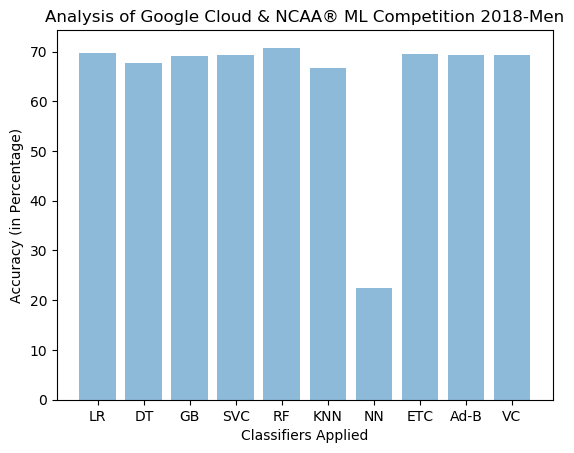

In [18]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('LR', 'DT', 'GB', 'SVC', 'RF', 'KNN', 'NN', 'ETC', 'Ad-B','VC')
y_pos = np.arange(len(objects))
performance = [69.63,67.77, 69.14, 69.22, 70.76, 66.72, 22.45, 69.54, 69.22,69.3]
 
ax =plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy (in Percentage)')
plt.xlabel('Classifiers Applied')
plt.title('Analysis of Google Cloud & NCAA® ML Competition 2018-Men')

plt.show()
plt.savefig('Accuracy Comparision.png', format='png')

<Figure size 640x480 with 0 Axes>

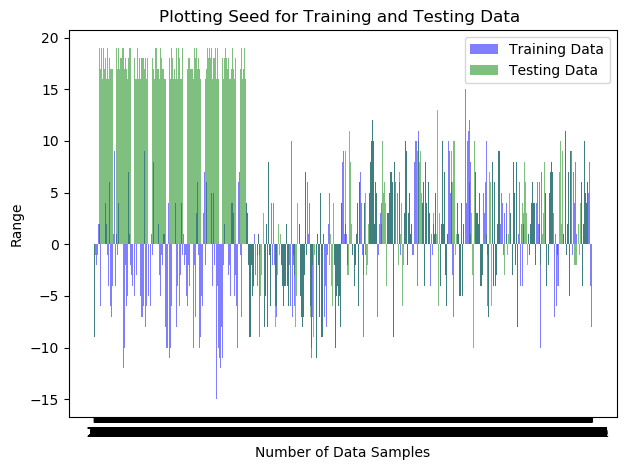

In [19]:
import numpy as np
import matplotlib.pyplot as plt

n_groups =len(z)
Training = df_predictions['SeedDiff']
Test = z
bar_width = 0.35
opacity = 0.8
fig, ax = plt.subplots()
index = np.arange(n_groups)
rects1 = plt.bar(index, Training, align='center', alpha=0.5,color='b', label='Training Data')
rects2 = plt.bar(index + bar_width, Test, align='center', alpha=0.5,color='g',label='Testing Data')
plt.xlabel('Number of Data Samples')
plt.ylabel('Range')
plt.title('Plotting Seed for Training and Testing Data ')
plt.xticks(index)
plt.legend()
 
plt.tight_layout()
plt.show()
plt.savefig('Testing Training Together.png', format='png')

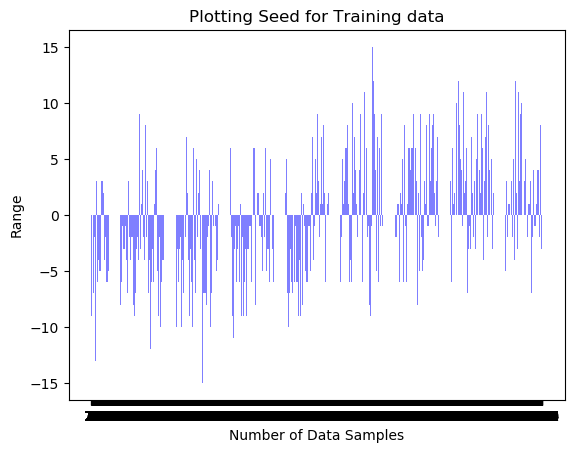

In [140]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

y_pos = np.arange(len(df_predictions['SeedDiff']))
performance = df_predictions['SeedDiff']
plt.bar(y_pos, performance, align='center', alpha=0.5,color='b')
plt.xticks(y_pos)
plt.xlabel('Number of Data Samples')
plt.ylabel('Range')
plt.title('Plotting Seed for Training data')
plt.show()

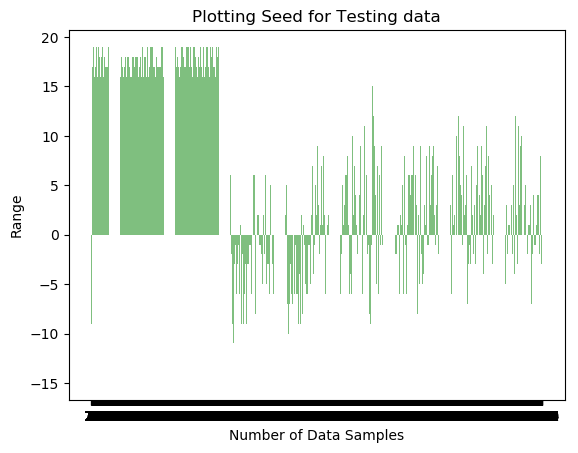

In [137]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

y_pos = np.arange(len(z))
performance = z
plt.bar(y_pos, performance, align='center', alpha=0.5,color='g')
plt.xticks(y_pos)
plt.xlabel('Number of Data Samples')
plt.ylabel('Range')
plt.title('Plotting Seed for Testing data')
plt.show()